In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from scipy.stats import skew
from matplotlib.colors import ListedColormap
import pandas as pd

In [2]:
def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

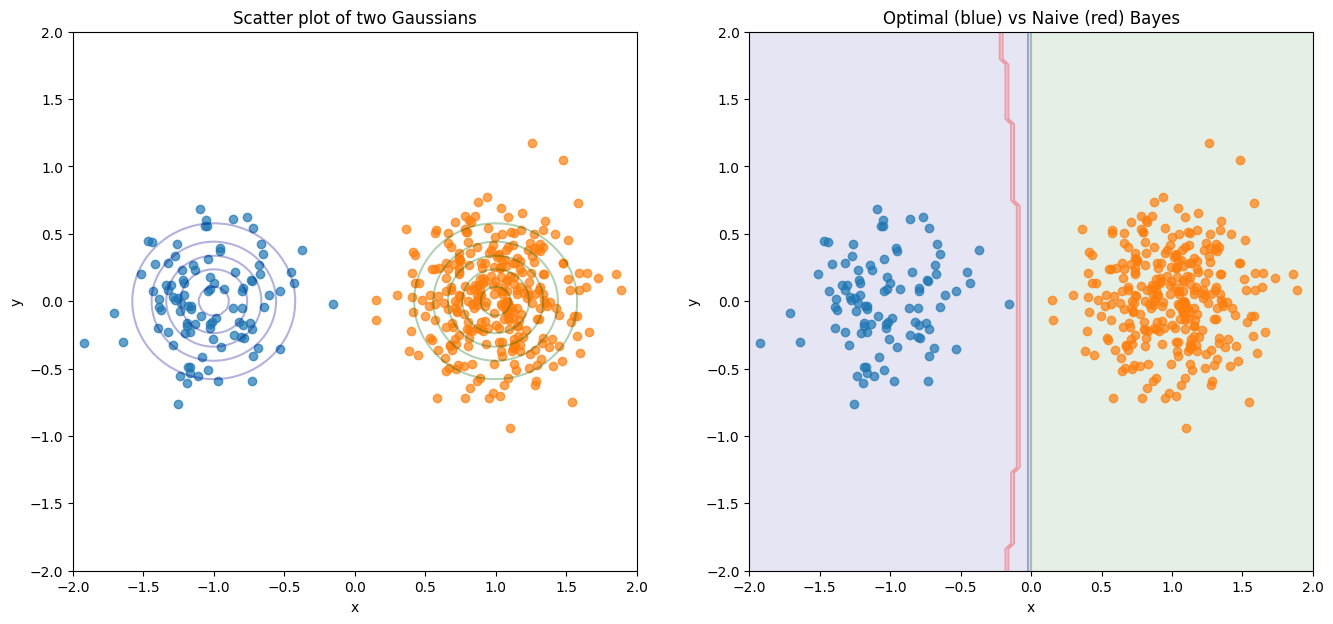

In [30]:
np.random.seed(seed = 3)

mu1 = [-1, 0]
sigma1 = [[0.1, 0], [0, 0.1]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

mu2 = [1, 0]
sigma2 = [[0.1, 0], [0, 0.1]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 300).T

mu_list = [mu1,mu2]
sigma_list = [sigma1,sigma2]
color_list = ['darkblue','darkgreen']

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

#Setup of figure
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Plotting the contours of the Gaussians on left hand side plot
for i in range(2):
    zz = np.array(  [scipy.stats.multivariate_normal.pdf(np.array([xx,yy]), mean=mu_list[i], cov=sigma_list[i]) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
    Z = zz.reshape(X.shape)

#Plot the  contours
    ax.contour( X, Y, Z, 5, alpha = .3, colors = color_list[i])


ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of two Gaussians')

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Right hand side plot - Optimal Bayes classifier
ax = fig.add_subplot(1, 2, 2)

#Plotting the contours of the Gaussians on left hand side plot

zz = np.array(  [ predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('darkblue','darkgreen'))
ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('darkblue','darkgreen'))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(300)))

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

#Predictions for each point on meshgrid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('red'))



ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal (blue) vs Naive (red) Bayes')



plt.show()